In [1]:
import matplotlib.pyplot as plot
# from demo import *
import pandas as pd
# from ilp import ilp
from sample import *

In [2]:
# plt_files=[]
import os
plt_root_path='data/Data/000/Trajectory/'
threshold=10000
df=pd.read_csv('data/Data/000/Trajectory/20081023025304.plt',sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
point_set=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
point_set_size=point_set.shape[0]

for file in os.listdir(plt_root_path)[1:]:
    # print(file)
    df=pd.read_csv(plt_root_path+file,sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
    df_points=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
    point_set=np.concatenate((point_set,df_points))
    point_set_size+=df_points.shape[0]
    if point_set_size>threshold:
        break
print(len(point_set))

    

14788


In [3]:
point_set=point_set[:2000]

1548.64 (500, 2)


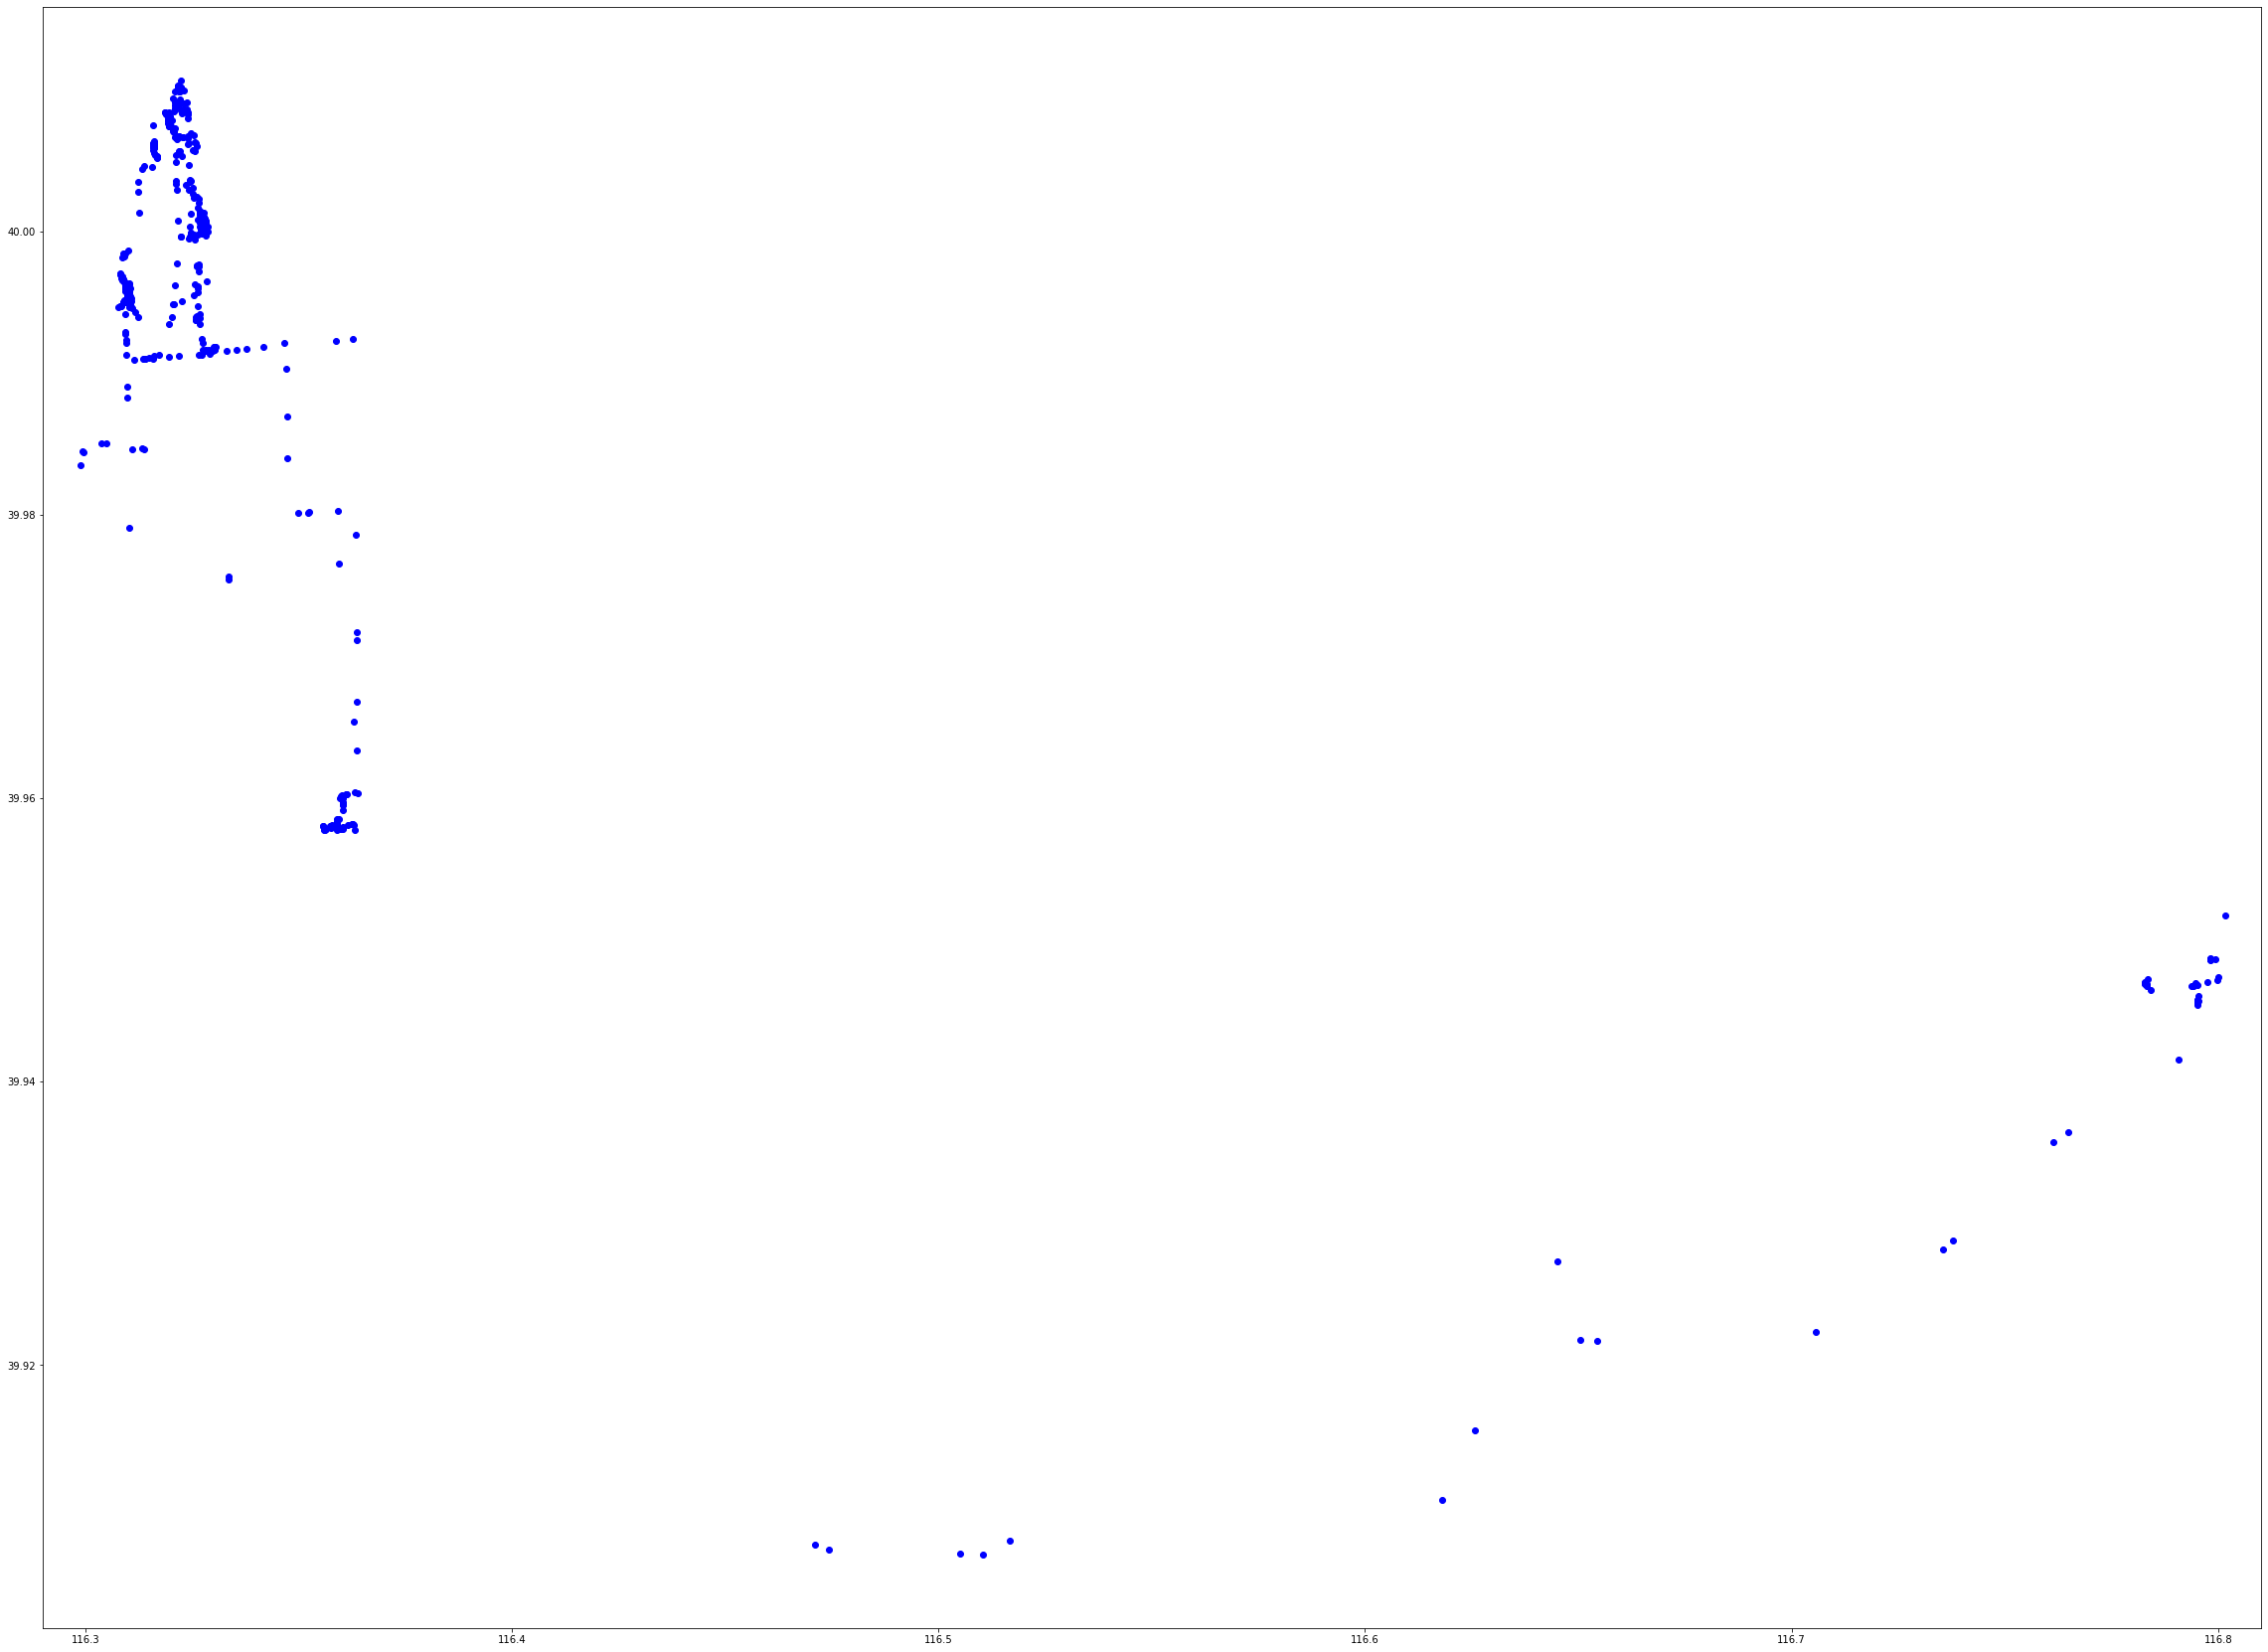

In [28]:
points=np.load('stop_points/int_14788_1.5.npy')
prox=proximity(points)
x=points[:,0]
y=points[:,1]
print(get_obj(points,prox),points.shape)
plot.figure(figsize=(40,30))
plot.xlim(116.29,116.81)
# (116.30771200000001, 116.80200500000001)
plot.scatter(x,y,c='b')
plot.show()  

stop_points/int_14788_10.npy
150.83 (500, 2)


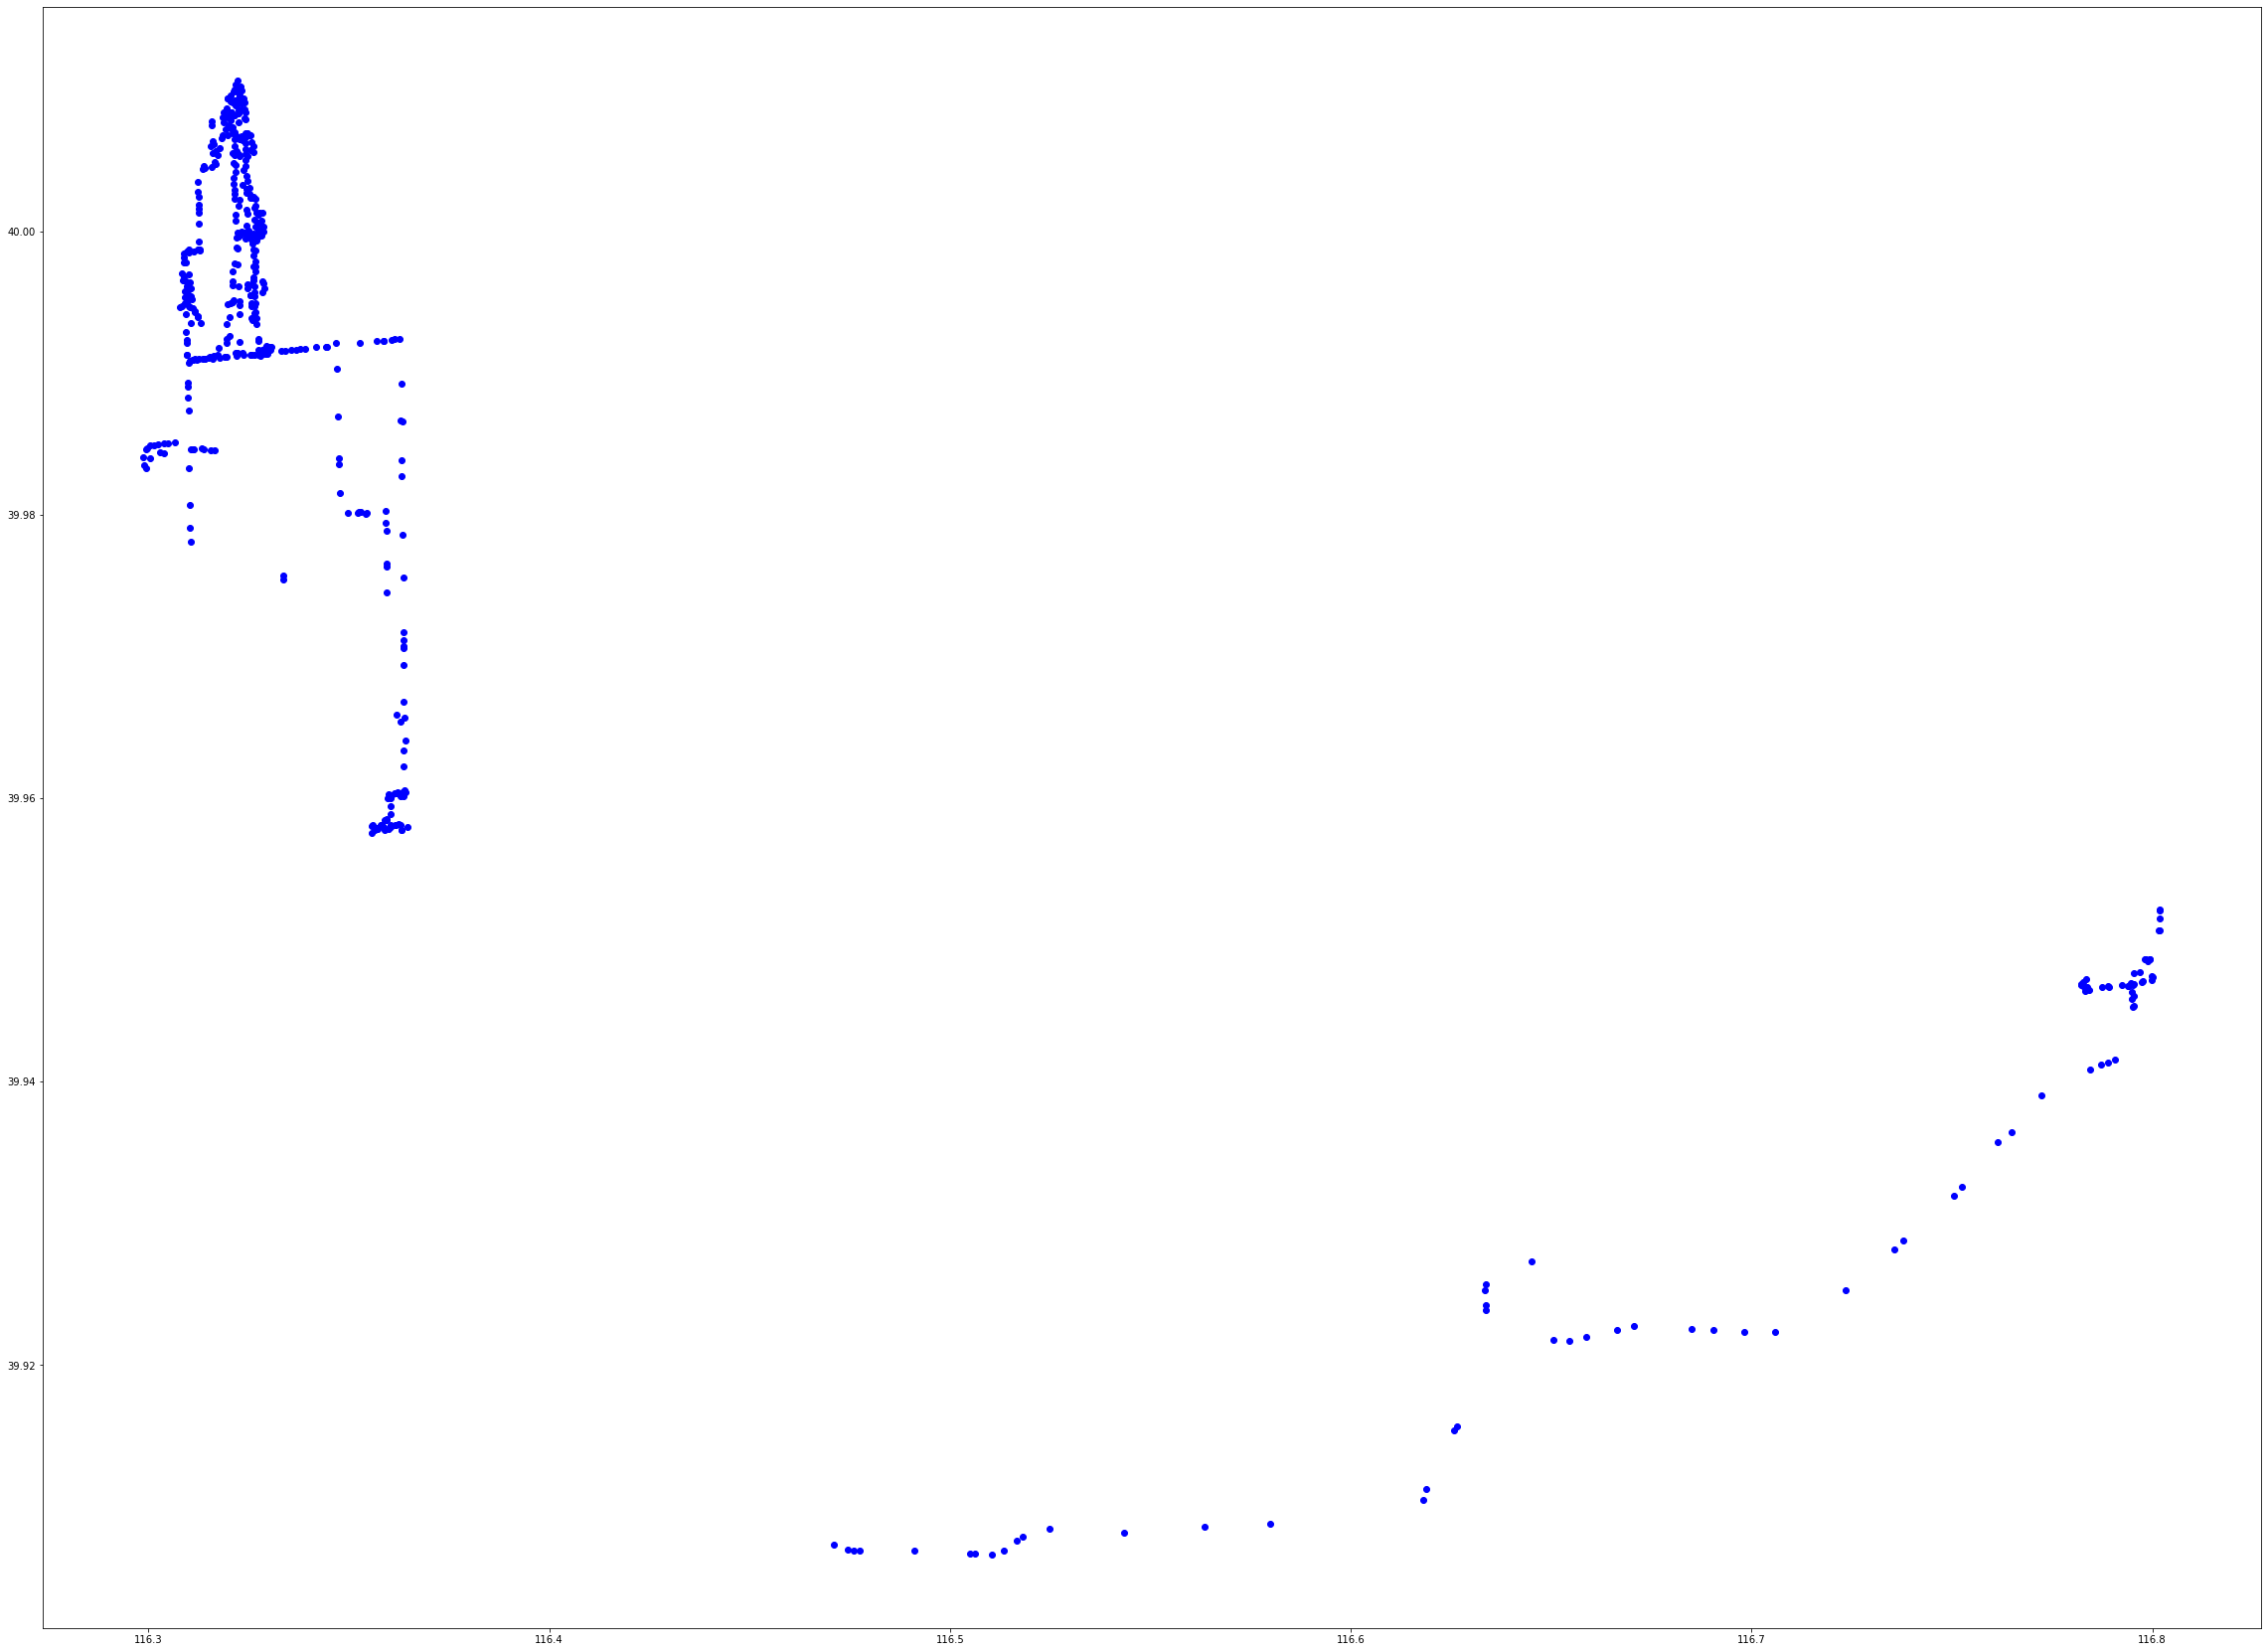

In [17]:
dir='stop_points/'
npy_files=[file for file in os.listdir(dir) if file.endswith('.npy')]
for record in npy_files[:1]:
    print(dir+record)
    # print(get_obj(points,1000))
    points=np.load(dir+record)
    prox=proximity(points)
    x=points[:,0]
    y=points[:,1]
    print(get_obj(points,prox),points.shape)
    plot.figure(figsize=(40,30))
    # plot.xlim(116.29,116.81)
    # (116.30771200000001, 116.80200500000001)
    plot.scatter(x,y,c='b')
    plot.show()    

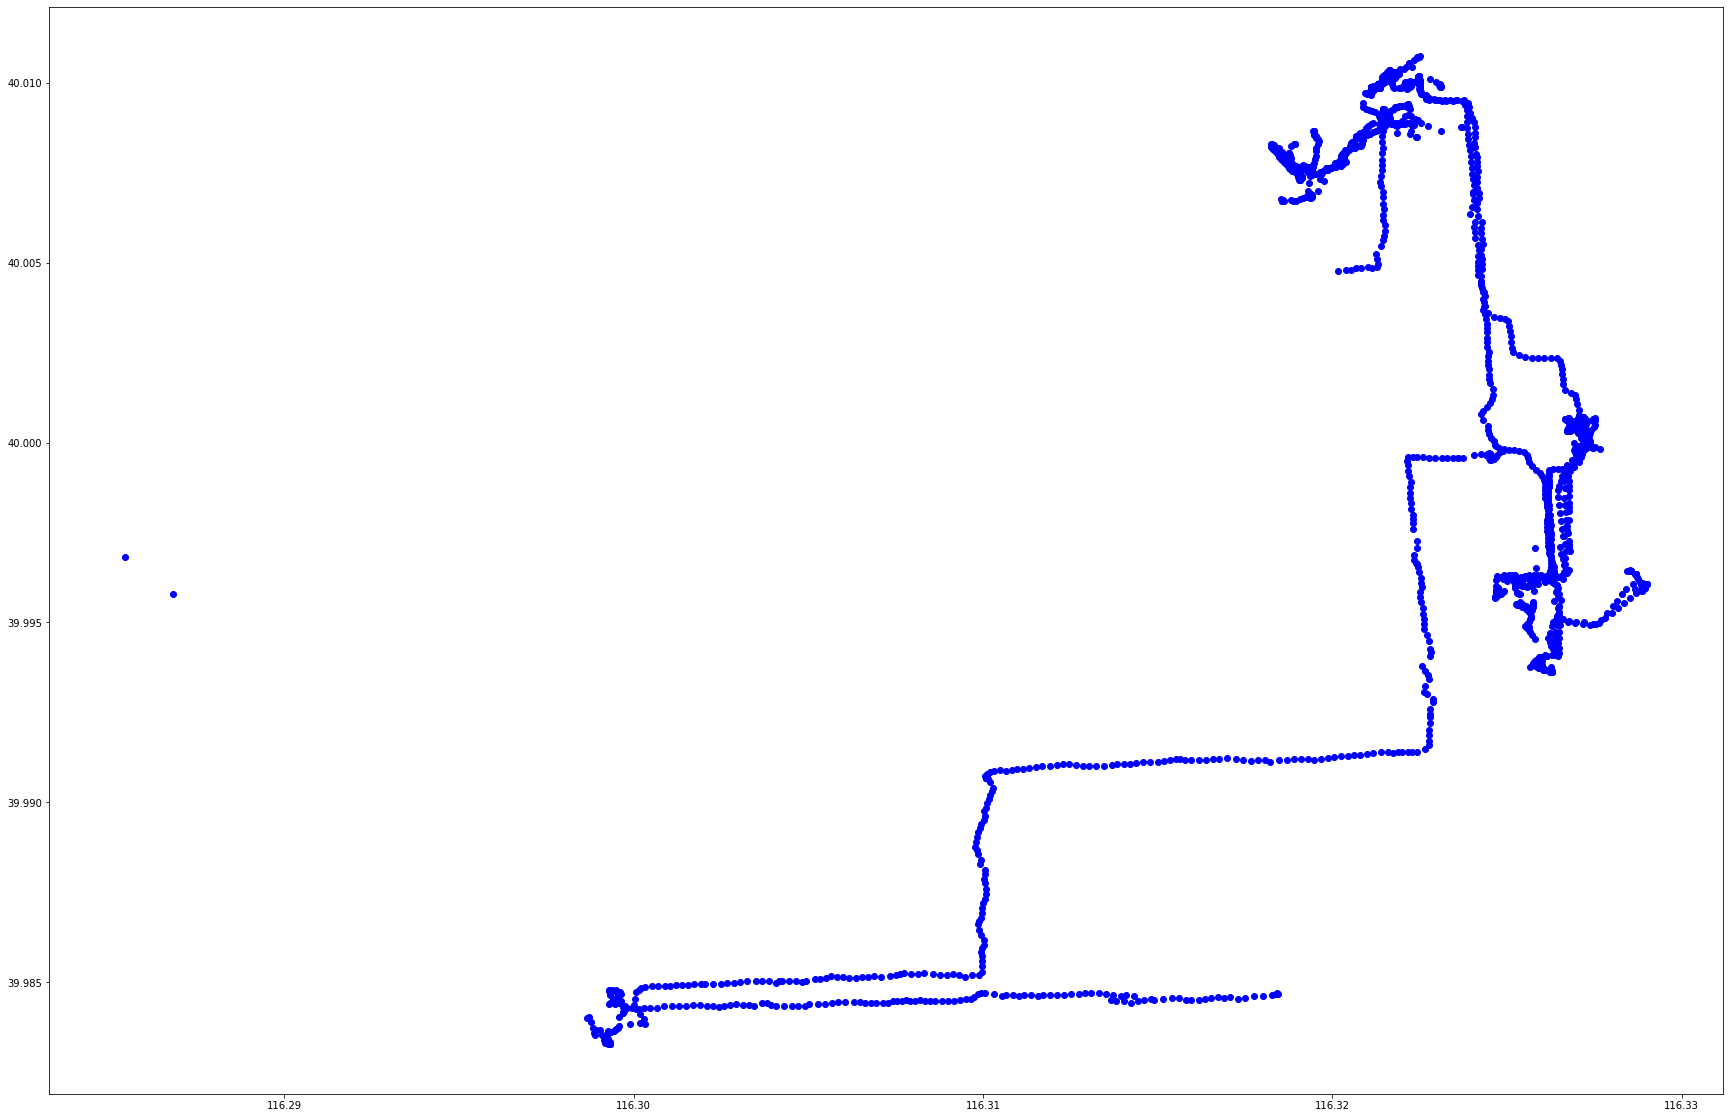

In [4]:
x=point_set[:,0]
y=point_set[:,1]
plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
plot.scatter(x,y,c='b')
plot.show()

In [9]:
x.sort()
x[0],x[-1]

(116.30771200000001, 116.80200500000001)

In [31]:
sample_size=100
# prox=proximity(point_set[:])

In [3]:
prox=proximity(point_set[:2000],set_eps=True)
prox.epsilon

1.8988414569991985e-07

In [34]:
from dense import *
get_adj_mat(point_set[:2000],sample_size)
get_heaps()
subgraph=dense_k(sample_size)
dk_samples=point_set[:2000][list(subgraph)]
dk_x=dk_samples[:,0]
dk_y=dk_samples[:,1]
# plot.figure(figsize=(30,20))
# plot.scatter(dk_x,dk_y,c='b')
# plot.show()

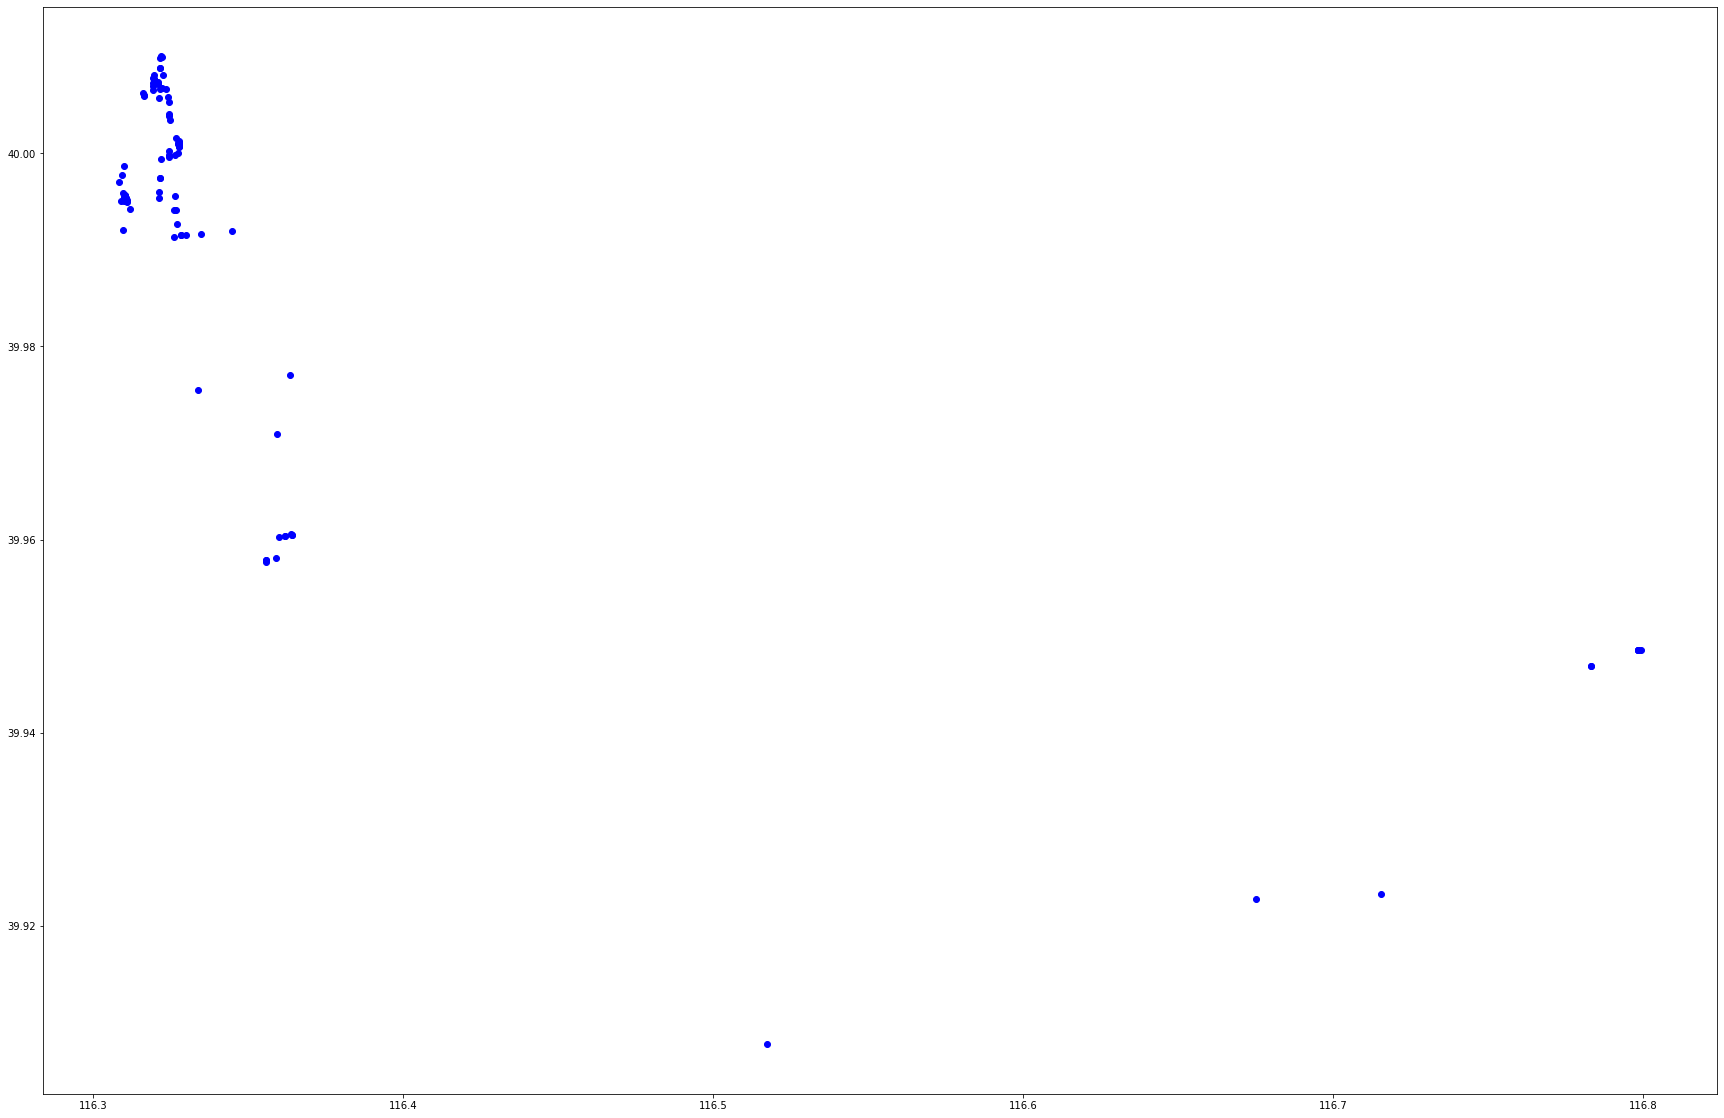

99.3


In [36]:
dk_x=dk_samples[:,0]
dk_y=dk_samples[:,1]
plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
plot.scatter(dk_x,dk_y,c='b')
plot.show()
print(get_obj(dk_samples,sample_size))

In [37]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set[:2000],sample_size)
print(get_obj(int_samples,sample_size))
int_x=int_samples[:,0]
int_y=int_samples[:,1]
# plot.figure(figsize=(40,30))
# plot.scatter(int_x,int_y,c='b')
# plot.show()

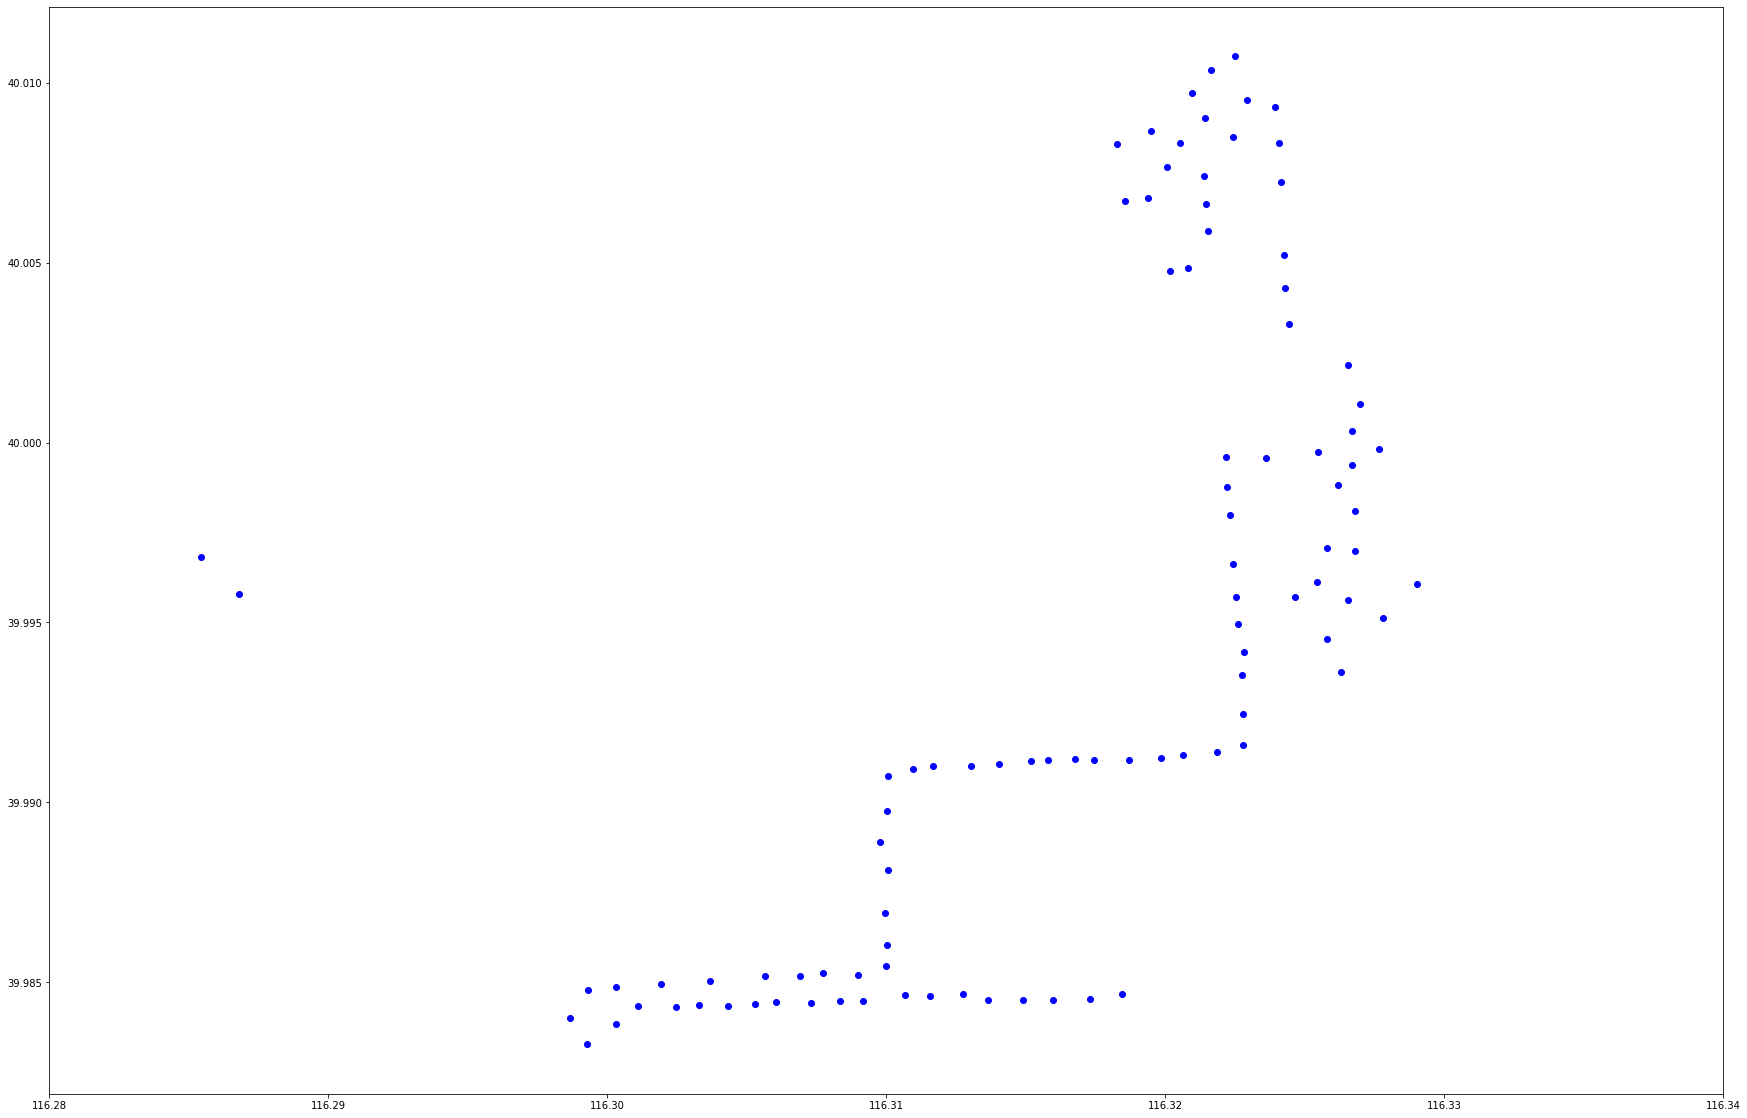

In [38]:
int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(int_x,int_y,c='b')
plot.show()

In [23]:
print(get_obj(rd_sample,sample_size))


12440.92


In [14]:
np.random.seed(0)
point_set=np.random.permutation(point_set)

In [22]:
import time

0.017922163009643555


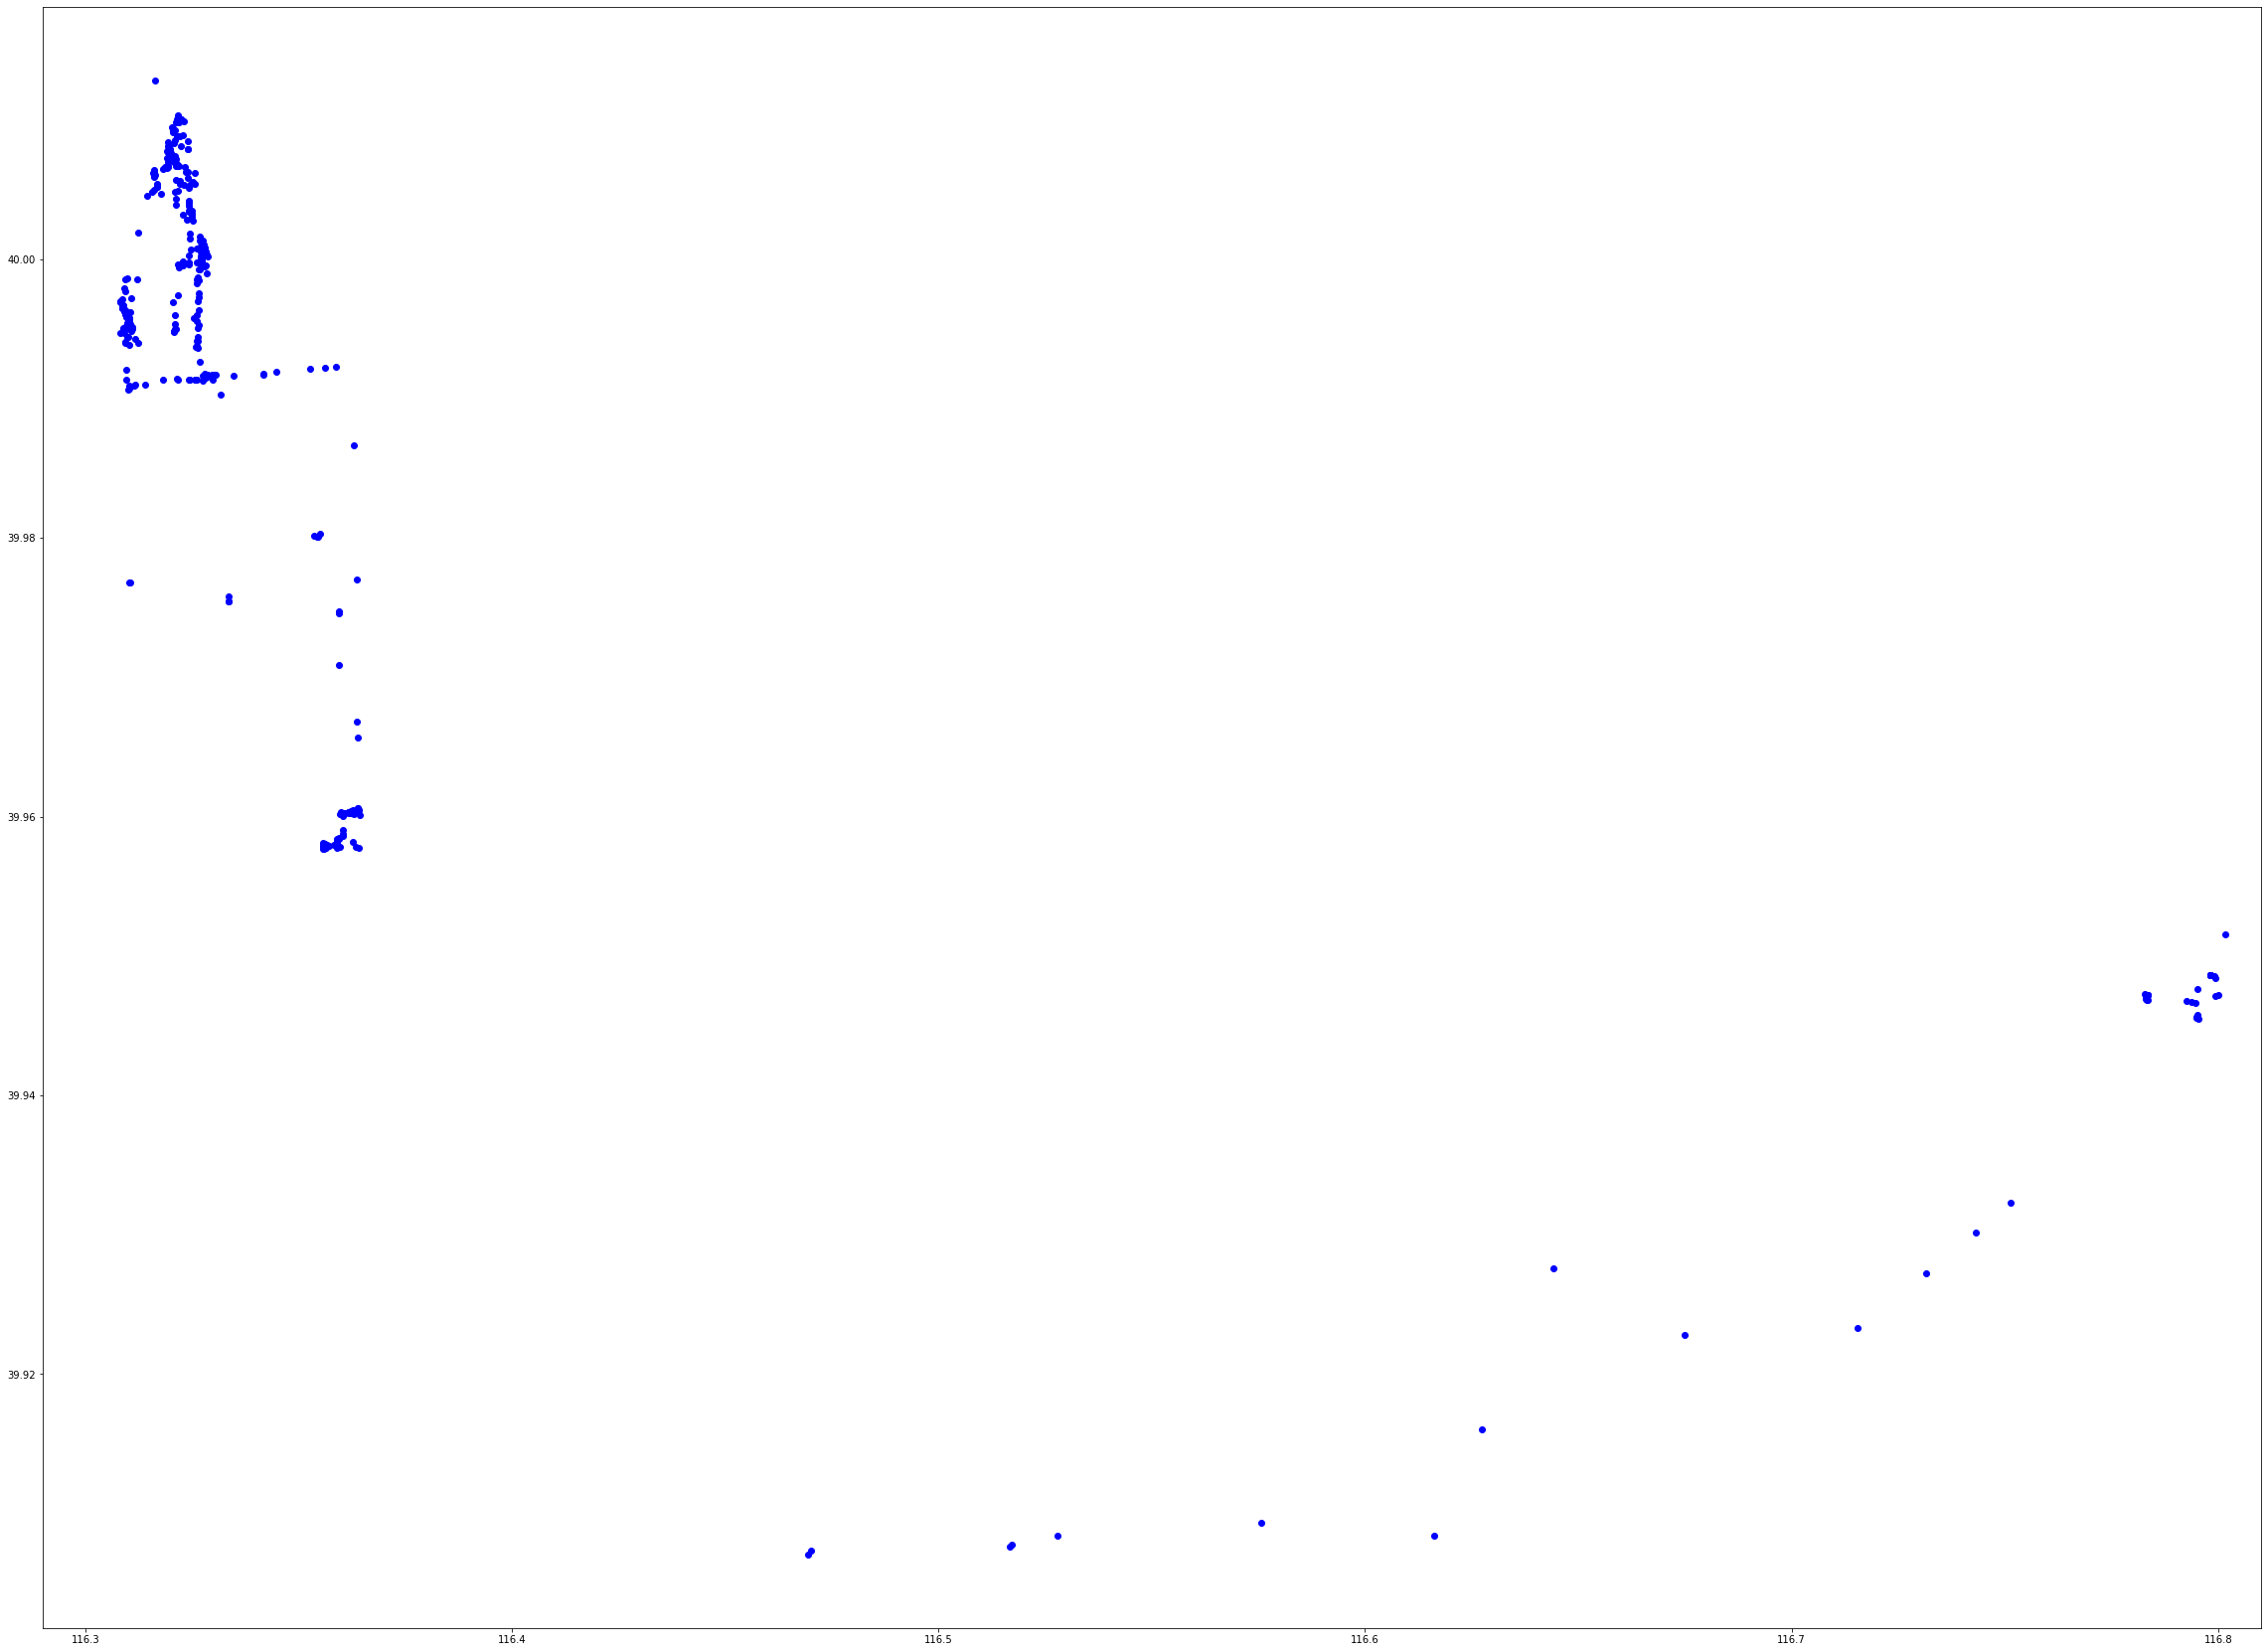

2200.02 (500, 2)


In [27]:
start=time.time()
rd_sample=ReservoirSample(point_set[:],500)
print(time.time()-start)
# print(get_obj(rd_sample,sample_size))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.figure(figsize=(40,30))
plot.xlim(116.29,116.81)
plot.scatter(rd_x,rd_y,c='b')
plot.show()
print(get_obj(rd_sample,prox),rd_sample.shape)

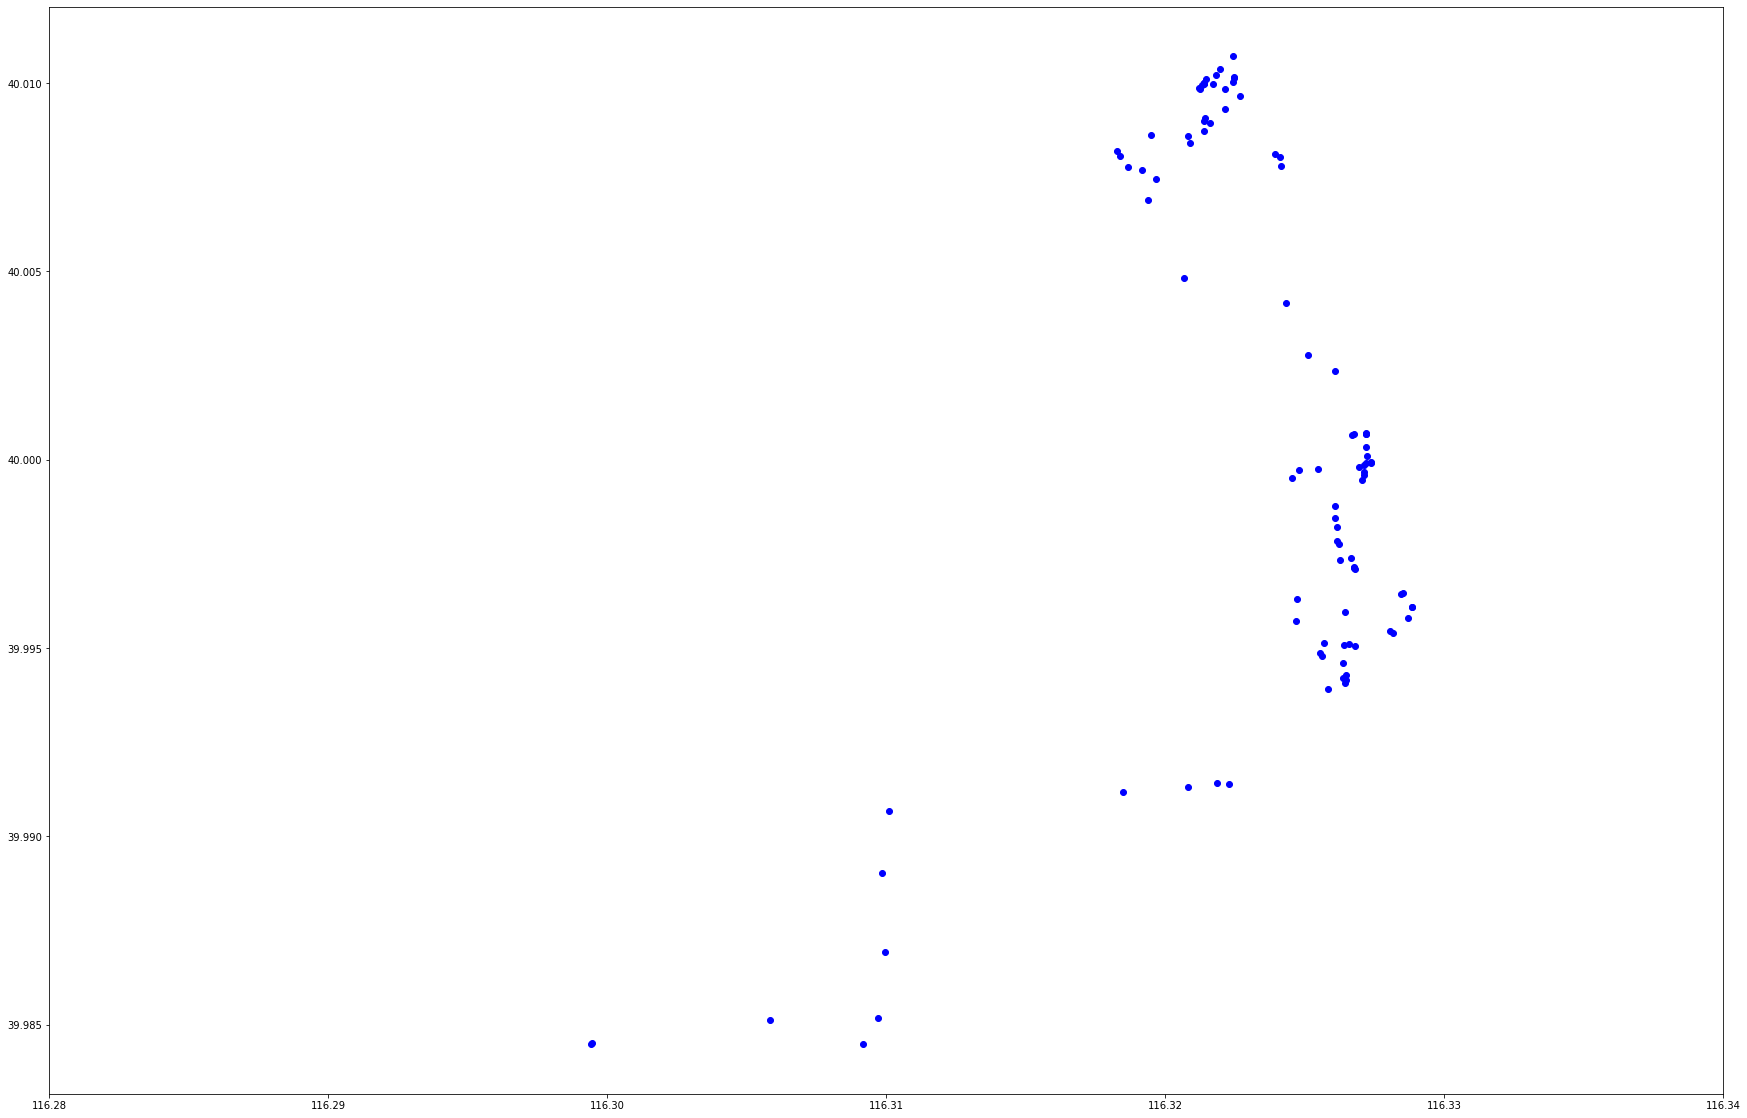

In [30]:
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(rd_x,rd_y,c='b')
plot.show()

0.021450281143188477


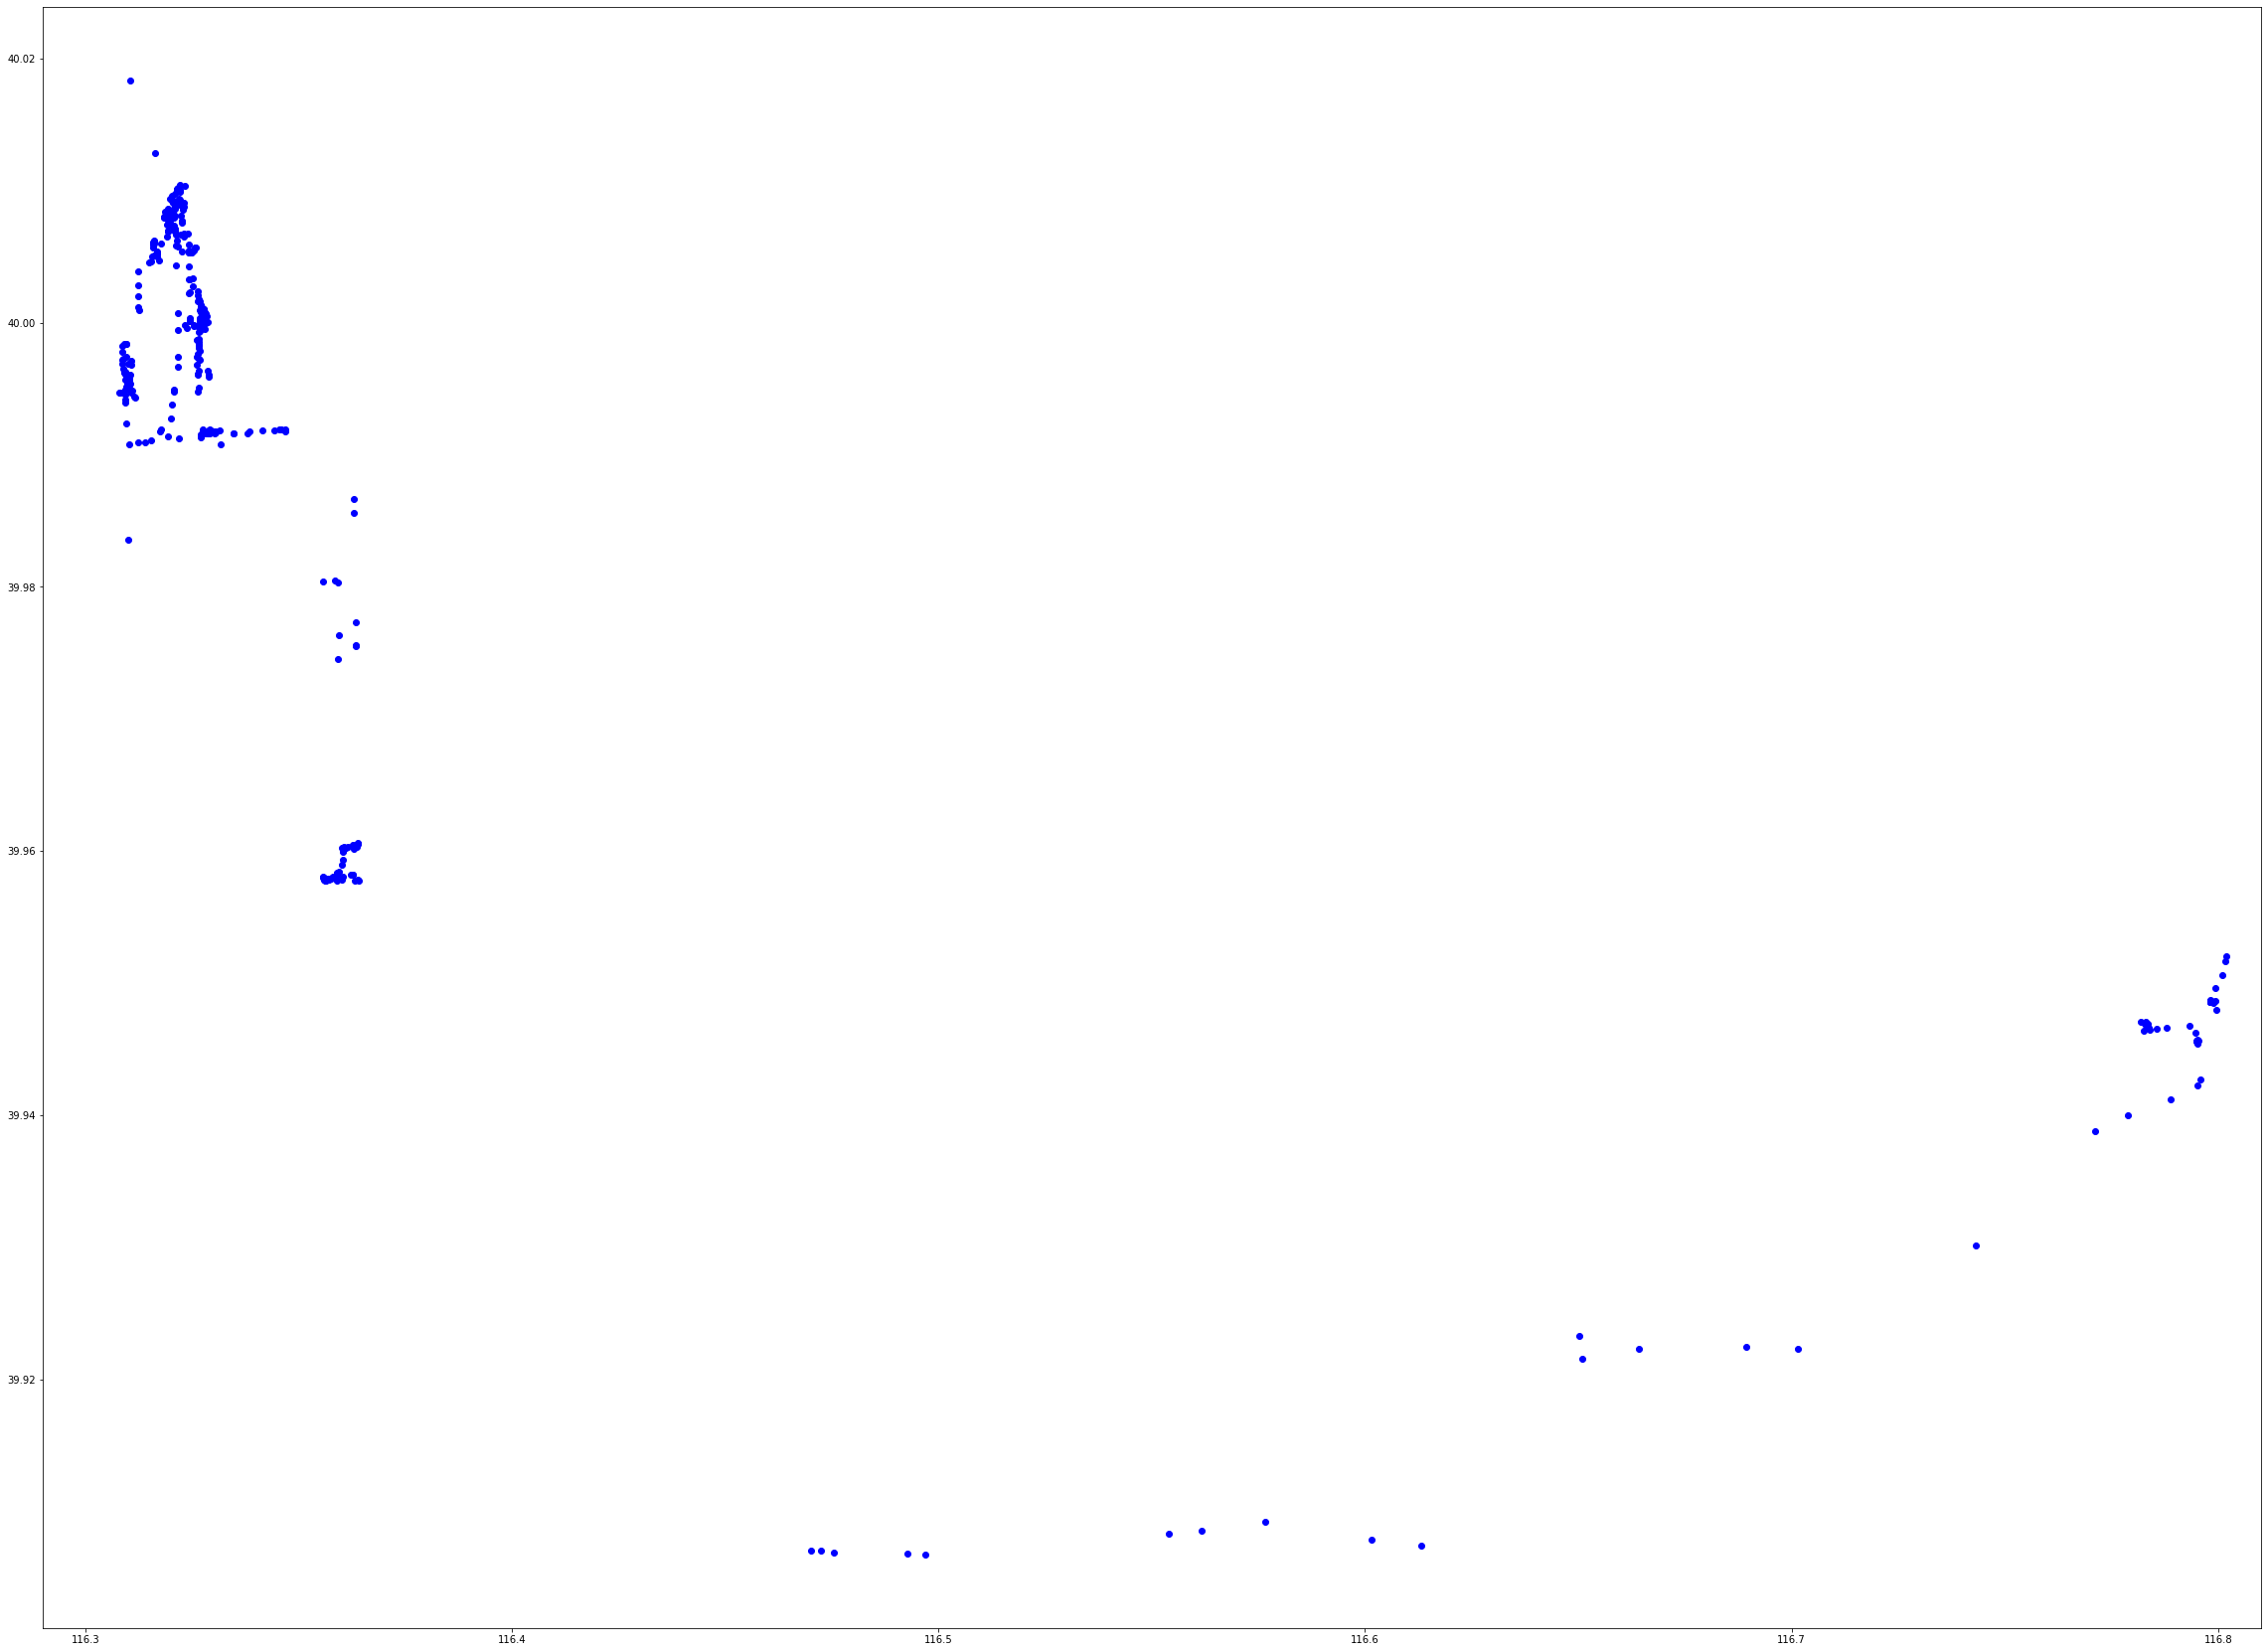

2022.21 (500, 2)


In [29]:
start=time.time()
st_sample=Stratified_sampling(point_set[:],500,100)
print(time.time()-start)
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.figure(figsize=(40,30))
plot.xlim(116.29,116.81)
plot.scatter(st_x,st_y,c='b')
plot.show()
print(get_obj(st_sample,prox),st_sample.shape)


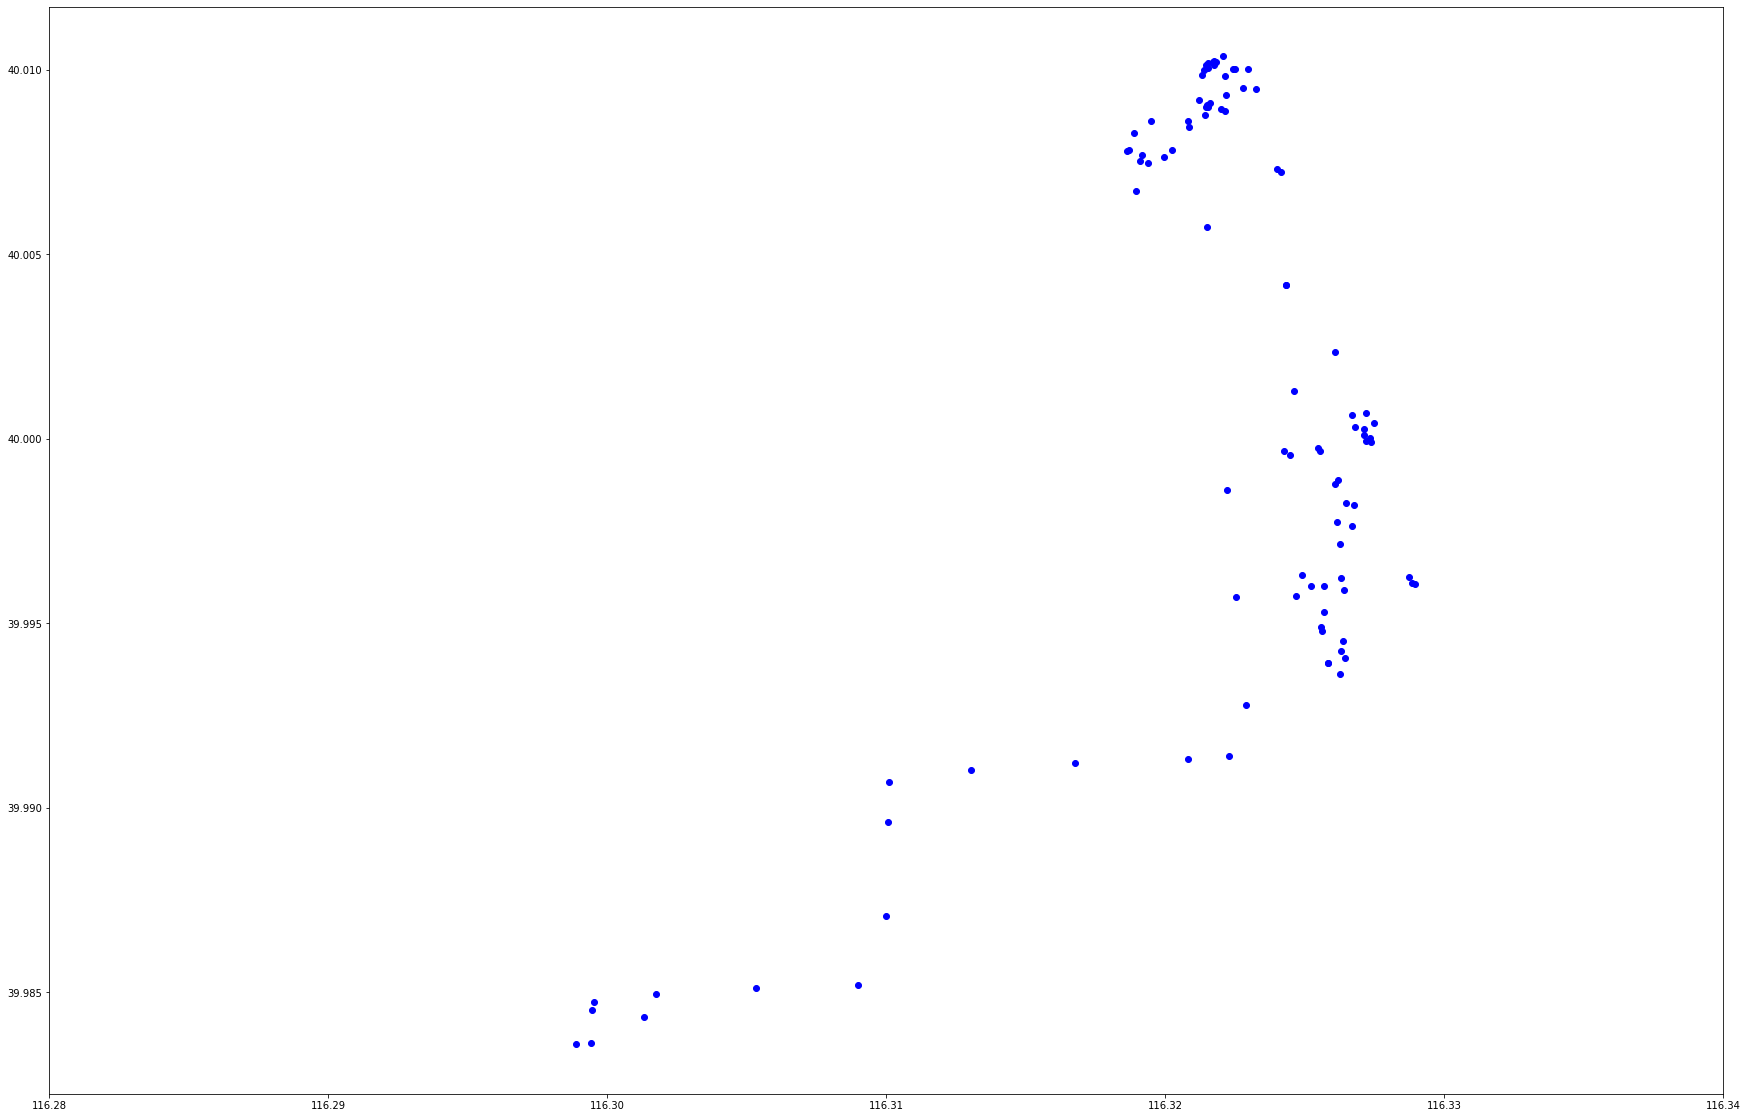

In [31]:
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.figure(figsize=(30,20))
plot.scatter(st_x,st_y,c='b')
plot.xlim(116.28,116.34)
plot.show()

In [3]:
df=pd.read_csv('data/Data/000/Trajectory/20081023025304.plt',sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)

In [11]:
# point_set=np.array(df.loc[:29,['Longitude','Latitude']].values.tolist())
prox=proximity(point_set,set_eps=True)
sample_size=10

In [12]:
prox.epsilon

3.2147064340016937e-07

In [22]:
def get_obj(samples,size):
    obj=0
    for i in range(size-1):
        for j in range(i+1,size):
            obj+=prox.run(samples[i],samples[j])    
            # obj+=proximity(samples[i],samples[j])
    return np.around(obj,2)

In [46]:
ilp_sample=np.load('ilp_50.npy')

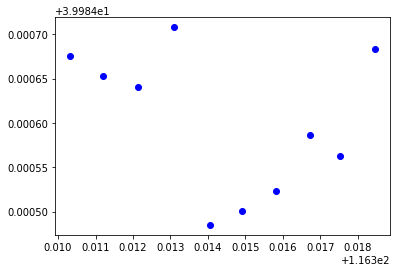

In [47]:
ilp_x=ilp_sample[0][:,0]
ilp_y=ilp_sample[0][:,1]
plot.scatter(ilp_x,ilp_y,c='b')

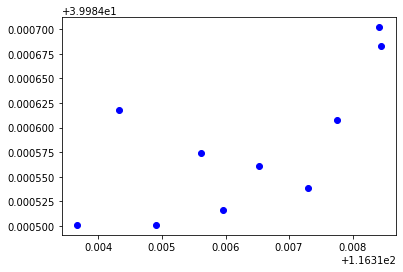

In [7]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set,sample_size)
# print(get_obj(int_samples,sample_size))
int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.scatter(int_x,int_y,c='b')

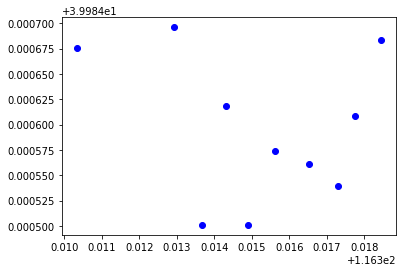

In [48]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set_1,10)
# print(get_obj(int_samples,sample_size))
int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.scatter(int_x,int_y,c='b')

In [6]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set,sample_size)
print(get_obj(int_samples,sample_size))
idices=[]
for idx,point in enumerate(point_set):
    if point in int_samples:
        idices.append(idx)
print(idices)

4.13
[0, 1, 2, 6, 8, 12, 15, 17, 20, 27, 28]


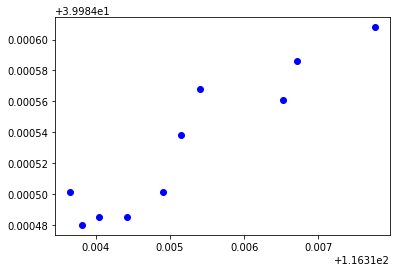

In [8]:
rd_sample=ReservoirSample(point_set,sample_size)
# print(get_obj(rd_sample,sample_size))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.scatter(rd_x,rd_y,c='b')

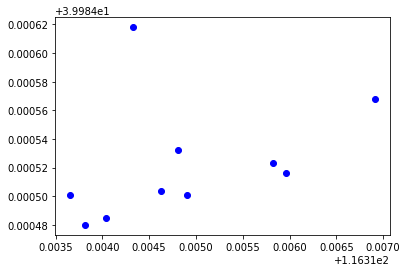

In [9]:
st_sample=Stratified_sampling(point_set,sample_size,5)
# print(get_obj(st_sample,sample_size))
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.scatter(st_x,st_y,c='b')

In [5]:
ilp_samples=ilp(point_set,3)
print(get_loss(ilp_samples,3))
# ilp_x=ilp_samples[:,0]
# ilp_y=ilp_samples[:,1]
# plot.scatter(ilp_x,ilp_y,c='b')

11 55
optimal
0.3301709058221377


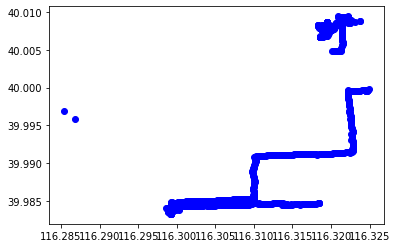

In [10]:
x=df.loc[:,['Longitude']].values.tolist()
y=df.loc[:,['Latitude']].values.tolist()
plot.scatter(x,y,c='b')

In [7]:
int_samples=interchange(point_set,3)
print(get_loss(int_samples,3))
# int_x=samples[:,0]
# int_y=samples[:,1]
# plot.scatter(int_x,int_y,c='b')

0.3301709058221377


In [8]:
rd_sample=ReservoirSample(point_set,3)
print(get_loss(rd_sample,3))

# rd_x=rd_sample[:,0]
# rd_y=rd_sample[:,1]
# plot.scatter(rd_x,rd_y,c='b')


2.091878246367592


In [9]:
st_sample=Stratified_sampling(point_set,3,5)
print(get_loss(st_sample,3))
# st_x=st_sample[:,0]
# st_y=st_sample[:,1]
# plot.scatter(st_x,st_y,c='b')


IndexError: index 2 is out of bounds for axis 0 with size 2